### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

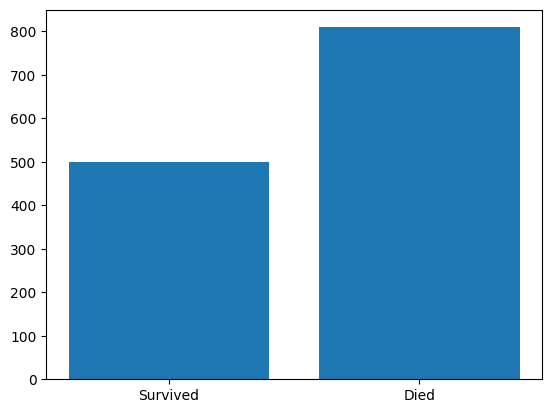

809

In [17]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
survived = df.survived.value_counts()[1]
died = df.survived.value_counts()[0]
plt.bar(['Survived', 'Died'], [survived,died])
plt.show()
died

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [18]:
#### preprocess the data
from sklearn.model_selection import train_test_split
df = df.drop(['name'], axis = 1)
# find and print the proportion of positive samples in data
vc = df.survived.value_counts()
precnetage = vc[1]/(vc[0]+vc[1])
print('% of positive samples in whole data:', precnetage)
X = df.drop('survived',axis=1)
y = df.survived
# split data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

p_train = y_train.value_counts()[1]/(y_train.value_counts()[1]+y_train.value_counts()[0])
p_test = y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0])
# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in train set:', p_train)
print('% of positive samples in test set:', p_test)

% of positive samples in whole data: 0.3819709702062643
% of positive samples in train set: 0.38204393505253104
% of positive samples in test set: 0.3816793893129771


In [21]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def process_data(X):
    # imputing missing values
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(X)
    X = pd.DataFrame(imputer.transform(X), columns=X.columns)

    # one-hot-encode categorical features
    def ohe_new_features(df, features_name, encoder):
        new_feats = encoder.transform(df[features_name])
        # create dataframe from encoded features with named columns
        new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
        new_df = pd.concat([df, new_cols], axis=1)    
        new_df.drop(features_name, axis=1, inplace=True)
        return new_df

    encoder = OneHotEncoder(sparse=False, drop='first')
    f_names = ['sex', 'embarked']
    encoder.fit(X[f_names])
    X = ohe_new_features(X, f_names, encoder)

    # feature scaling
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)
    return X

## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

0    809
1    202
Name: survived, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       809
           1       0.97      0.70      0.81       202

    accuracy                           0.94      1011
   macro avg       0.95      0.85      0.89      1011
weighted avg       0.94      0.94      0.93      1011

0    809
1    346
Name: survived, dtype: int64
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       809
           1       0.88      0.73      0.80       346

    accuracy                           0.89      1155
   macro avg       0.89      0.85      0.86      1155
weighted avg       0.89      0.89      0.89      1155

0    809
1    498
Name: survived, dtype: int64
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       809
           1       0.74      0.70      0.72       498

    accuracy                           0.

/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


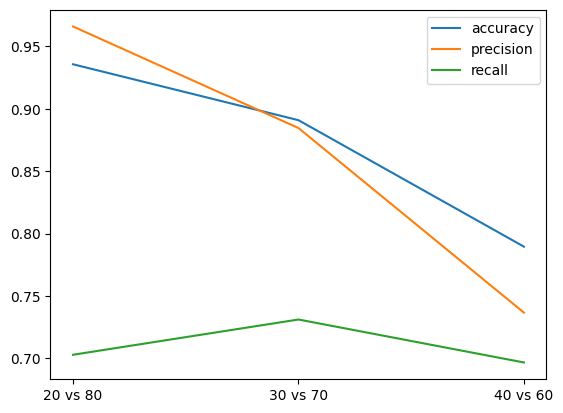

In [27]:
### write your code here 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
accuracies = []
precisions = []
recalls = []
y_pred_counts = []
true_counts = []
def train_and_test(X,y):
    X = process_data(X)
    model = LogisticRegression().fit(X, y)
    y_pred = model.predict(X)
    y_pred_counts.append(np.unique(y_pred, return_counts=True))
    true_counts.append(np.unique(y, return_counts=True))
    accuracy = metrics.accuracy_score(y,y_pred)
    precision = metrics.precision_score(y, y_pred)
    recall = metrics.recall_score(y,y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    print(metrics.classification_report(y,y_pred))
survived_rows = df[df['survived'] == 1]
died_rows = df[df['survived'] == 0]
precentages = [[0.2, 0.8], [0.3, 0.7], [0.37,0.6]]
for i in precentages:
    s = int((i[0]*len(died_rows))/i[1])
    data = pd.concat([survived_rows[:s], died_rows],axis=0)
    X = data.drop('survived',axis=1)
    y = data.survived
    print(y.value_counts())
    train_and_test(X, y)
splits = ["20 vs 80", "30 vs 70", "40 vs 60"]
plt.plot(splits, accuracies, label = 'accuracy')   
plt.plot(splits, precisions, label = 'precision')   
plt.plot(splits, recalls, label = 'recall')
plt.legend()
plt.show()

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

[(array([0, 1]), array([169,  34])), (array([0, 1]), array([172,  59])), (array([0, 1]), array([158, 104]))]
[(array([0, 1]), array([162,  41])), (array([0, 1]), array([162,  69])), (array([0, 1]), array([162, 100]))]


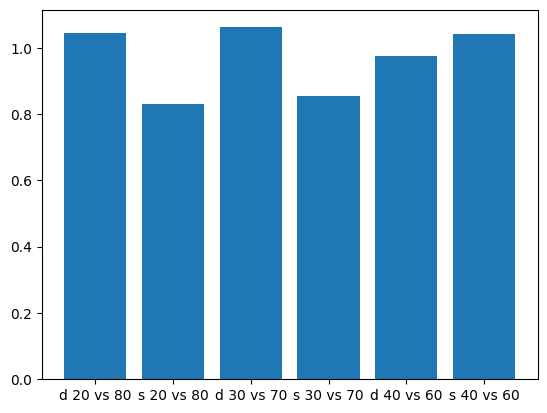

In [ ]:
#### write your code 
accuracies = []
for i in range(3):
    survived_pred = y_pred_counts[i][1][0]
    survived_true = true_counts[i][1][0]
    died_pred = y_pred_counts[i][1][1]
    died_true = true_counts[i][1][1]
    accuracies.append(survived_pred/survived_true)
    accuracies.append(died_pred/died_true)
print(y_pred_counts)
print(true_counts)
plt.bar(["d 20 vs 80", "s 20 vs 80", "d 30 vs 70", "s 30 vs 70", "d 40 vs 60", "s 40 vs 60"], accuracies)
plt.show()

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Write your report here`
First we have to note that the values before the artifitial class imbalance was:
Accuracy: 0.8091603053435115
Precision: 0.7
Recall: 0.7777777777777778

20 vs 80

In this case if the model output 0 all the time, it will get 80% accuracy. But in our case, it is trained which mean it can preform better and predect the survived class slightly better which increases the accuracy dramaticaly to +0.95

in this case also, the FP will not be a big number which mean we will have high precision

However, since the model tends to always predict 0, it will have alot of FN values which leads to lower recall

30 vs 70

By increasing the number of survived samples the model will have less accuracy and precision due to the increase in the FP which comes from the fact that the model can't fit will this class due to the small number of samples in the training dataset

